# North America virtual geomagnetic poles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import cartopy.crs as ccrs
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [2]:
current_path = os.getcwd() 
data_path = current_path + "/data/"

## 2_Michoacan_Guanajuato_volcanic_ﬁeld

In [3]:
#file_name = "/2_Michoacan_Guanajuato_volcanic_ﬁeld.csv"
#vgps_2 = pd.read_csv(data_path_PP + file_name,header=5)
#vgps_2.shape

file_name = "VGPs_catalog.csv"
vgps = pd.read_csv(data_path + file_name)
vgps

,pole_id,vgp_id,Name,slat,slon,n,dec,inc,k,α95,...,A95,age,min_age,max_age,error_dist,lithology,Q,ref,age ref,comments (Q breakdown)
0,2_Michoacan_Guanajuato_volcanic_ﬁeld,1,Tan2 (TV),19.416194,-102.304861,8,353.5,43.5,199,3.9,...,NaN,0.209,0.168,0.250,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
1,2_Michoacan_Guanajuato_volcanic_ﬁeld,2,Tan3 (UR-4),19.374361,-102.091028,8,339.9,60.9,242,3.6,...,NaN,0.429,0.365,0.493,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
2,2_Michoacan_Guanajuato_volcanic_ﬁeld,3,Tan6 (Tan26),19.425722,-102.435528,7,17.9,58.6,41,9.6,...,NaN,0.256,0.238,0.274,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
3,2_Michoacan_Guanajuato_volcanic_ﬁeld,4,Tan7 (Tan10),19.308889,-102.539583,6,348.6,28.1,115,6.3,...,NaN,0.373,0.312,0.434,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
4,2_Michoacan_Guanajuato_volcanic_ﬁeld,5,Tan8 (Tan43),19.261861,-102.564056,8,2.5,27.7,359,2.9,...,NaN,0.612,0.571,653.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
5,2_Michoacan_Guanajuato_volcanic_ﬁeld,6,Tan9 (Tan 43),19.268194,-102.569011,8,352.7,31.3,39,9.2,...,NaN,0.612,0.571,653.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
6,2_Michoacan_Guanajuato_volcanic_ﬁeld,7,Tan10 (NI 19),19.164556,-102.215750,7,1.2,32.8,69,7.3,...,NaN,0.820,0.580,106.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
7,2_Michoacan_Guanajuato_volcanic_ﬁeld,8,Tan11 (NI 18),19.010250,-102.067639,7,349.3,43.6,189,4.3,...,NaN,0.163,0.126,200.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN


In [4]:
vgps_2 = vgps[vgps.pole_id == "2_Michoacan_Guanajuato_volcanic_ﬁeld"]
vgps_2

,pole_id,vgp_id,Name,slat,slon,n,dec,inc,k,α95,...,A95,age,min_age,max_age,error_dist,lithology,Q,ref,age ref,comments (Q breakdown)
0,2_Michoacan_Guanajuato_volcanic_ﬁeld,1,Tan2 (TV),19.416194,-102.304861,8,353.5,43.5,199,3.9,...,NaN,0.209,0.168,0.250,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
1,2_Michoacan_Guanajuato_volcanic_ﬁeld,2,Tan3 (UR-4),19.374361,-102.091028,8,339.9,60.9,242,3.6,...,NaN,0.429,0.365,0.493,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
2,2_Michoacan_Guanajuato_volcanic_ﬁeld,3,Tan6 (Tan26),19.425722,-102.435528,7,17.9,58.6,41,9.6,...,NaN,0.256,0.238,0.274,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
3,2_Michoacan_Guanajuato_volcanic_ﬁeld,4,Tan7 (Tan10),19.308889,-102.539583,6,348.6,28.1,115,6.3,...,NaN,0.373,0.312,0.434,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
4,2_Michoacan_Guanajuato_volcanic_ﬁeld,5,Tan8 (Tan43),19.261861,-102.564056,8,2.5,27.7,359,2.9,...,NaN,0.612,0.571,653.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
5,2_Michoacan_Guanajuato_volcanic_ﬁeld,6,Tan9 (Tan 43),19.268194,-102.569011,8,352.7,31.3,39,9.2,...,NaN,0.612,0.571,653.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
6,2_Michoacan_Guanajuato_volcanic_ﬁeld,7,Tan10 (NI 19),19.164556,-102.215750,7,1.2,32.8,69,7.3,...,NaN,0.820,0.580,106.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN
7,2_Michoacan_Guanajuato_volcanic_ﬁeld,8,Tan11 (NI 18),19.010250,-102.067639,7,349.3,43.6,189,4.3,...,NaN,0.163,0.126,200.000,normal,lava flows,NaN,Maciel Peña et al. (2009),Ownby et al. (2007),NaN


In [1]:
ipmag.vgp_calc(vgps_2,site_lon='slon',site_lat='slat',dec_tc='dec',inc_tc='inc')
vgps_2.shape

NameError: name 'ipmag' is not defined

In [20]:
vgps_2_pole = ipmag.fisher_mean(vgps_2.vgp_lon,vgps_2.vgp_lat)

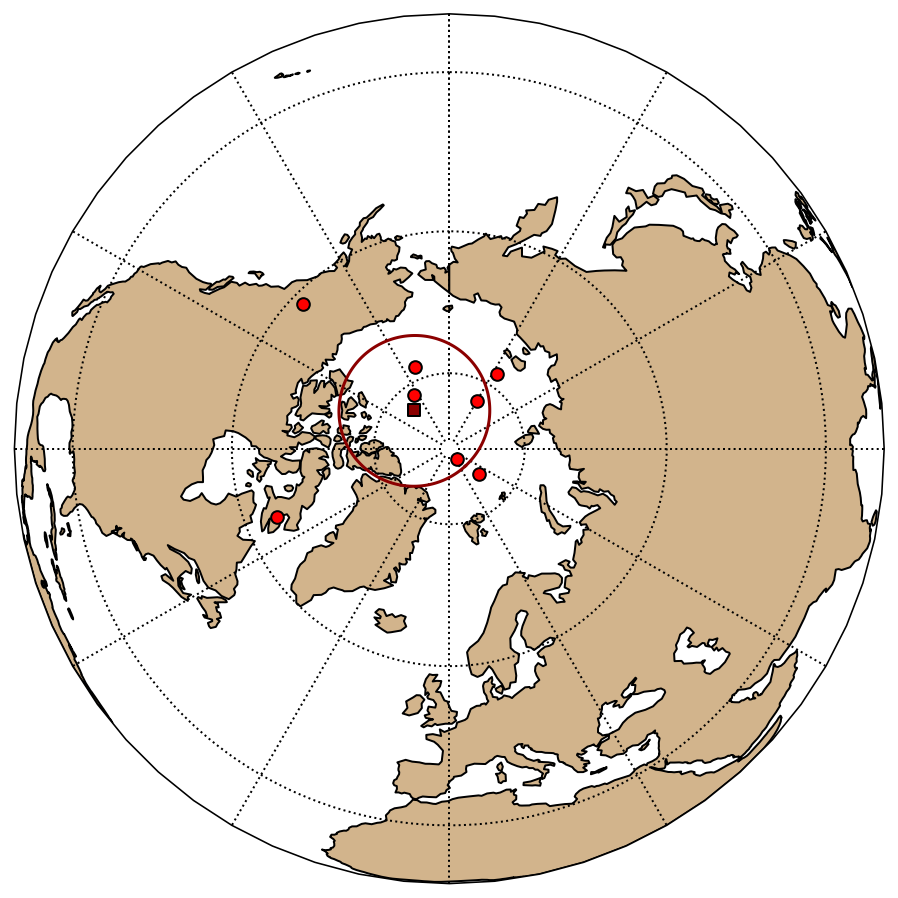

In [26]:
map_axis = ipmag.make_orthographic_map(0, 90)
ipmag.plot_vgp(map_axis, df_vgps_2['vgp_lon'], df_vgps_2['vgp_lat'],markersize=40,color='red')
ipmag.plot_pole(map_axis, plon=vgps_2_pole['dec'], 
                   plat=vgps_2_pole['inc'], 
                   A95=vgps_2_pole['alpha95'], 
                   color = 'darkred', marker='s', markersize=40)